<a href="https://colab.research.google.com/github/alinorouziani/Multi-ClassModelWithPytorch/blob/main/Multi_ClassModelWithPytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [46]:
def accuracy(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct /len(y_true)) * 100
  return acc

import torch
import numpy as np
import matplotlib.pyplot as plt

def plot_decision(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap='rainbow', alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='rainbow')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

###Make our data:

In [40]:
number_classes = 4
features = 2
x_blob, y_blob = make_blobs(n_samples = 1000, centers = number_classes, n_features= features, cluster_std=1.6, random_state=42)
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=42)

###Visualize it:

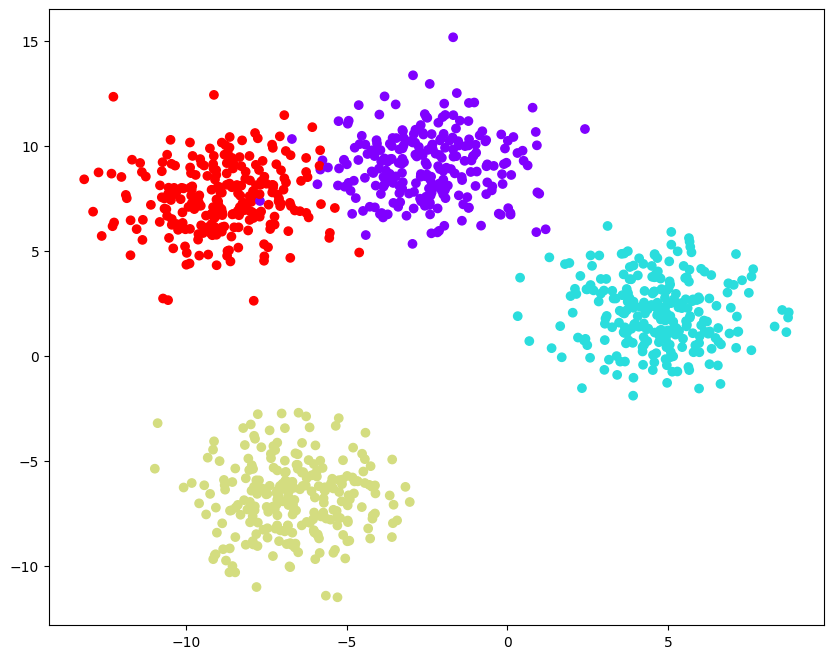

In [41]:
plt.figure(figsize=(10, 8))
plt.scatter(x_blob[:,0], x_blob[:,1], c=y_blob, cmap='rainbow')

###Build a model:

In [42]:
class Model(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )
  def forward(self, x):
    return self.layer_stack(x)

In [43]:
model = Model(input_features=2, output_features=4, hidden_units=10)

##Train a model:

In [44]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.1)
epochs = 100
for epoch in range(epochs):
  model.train()
  y_logits = model(x_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_function(y_logits, y_blob_train)
  acc = accuracy(y_blob_train, y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model.eval()
  with torch.inference_mode():
    test_logits = model(x_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss = loss_function(test_logits, y_blob_test)
    test_acc = accuracy(y_blob_test, test_pred)
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 2.31937 | Acc: 19.12% | Test Loss: 1.34838 | Test Acc: 36.50%
Epoch: 10 | Loss: 0.40996 | Acc: 97.50% | Test Loss: 0.36003 | Test Acc: 99.00%
Epoch: 20 | Loss: 0.13642 | Acc: 98.62% | Test Loss: 0.12483 | Test Acc: 99.50%
Epoch: 30 | Loss: 0.08645 | Acc: 98.62% | Test Loss: 0.07789 | Test Acc: 99.50%
Epoch: 40 | Loss: 0.06837 | Acc: 98.62% | Test Loss: 0.05983 | Test Acc: 99.50%
Epoch: 50 | Loss: 0.05941 | Acc: 98.62% | Test Loss: 0.05051 | Test Acc: 99.50%
Epoch: 60 | Loss: 0.05419 | Acc: 98.62% | Test Loss: 0.04491 | Test Acc: 99.50%
Epoch: 70 | Loss: 0.05081 | Acc: 98.62% | Test Loss: 0.04119 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.04841 | Acc: 98.62% | Test Loss: 0.03851 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.04663 | Acc: 98.62% | Test Loss: 0.03652 | Test Acc: 99.50%


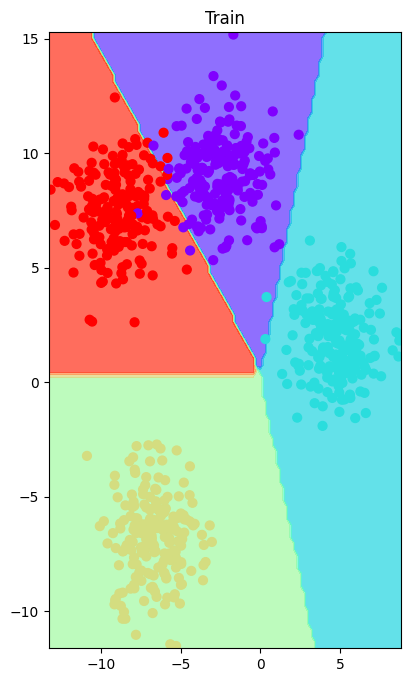

In [53]:
plt.figure(figsize=(10, 8))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision(model,x_blob_train,y_blob_train)

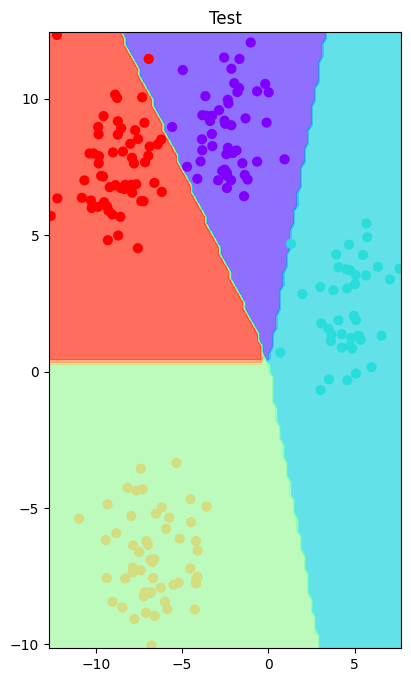

In [52]:
plt.figure(figsize=(10, 8))
plt.subplot(1,2,2)
plt.title('Test')
plot_decision(model,x_blob_test,y_blob_test)